In [5]:
from nltk.corpus import gutenberg

import nltk
from operator import itemgetter



In [9]:
alice_raw= nltk.corpus.gutenberg.raw('carroll-alice.txt')
print(alice_raw[:702])

[Alice's Adventures in Wonderland by Lewis Carroll 1865]

CHAPTER I. Down the Rabbit-Hole

Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversations in
it, 'and what is the use of a book,' thought Alice 'without pictures or
conversation?'

So she was considering in her own mind (as well as she could, for the
hot day made her feel very sleepy and stupid), whether the pleasure
of making a daisy-chain would be worth the trouble of getting up and
picking the daisies, when suddenly a White Rabbit with pink eyes ran
close by her.

There was nothing


#### Normalization morpheme

In [14]:
# step 1
sent = alice_raw[1:500]


In [15]:
from nltk.tokenize import word_tokenize
word_tokenize(sent)

['Alice',
 "'s",
 'Adventures',
 'in',
 'Wonderland',
 'by',
 'Lewis',
 'Carroll',
 '1865',
 ']',
 'CHAPTER',
 'I',
 '.',
 'Down',
 'the',
 'Rabbit-Hole',
 'Alice',
 'was',
 'beginning',
 'to',
 'get',
 'very',
 'tired',
 'of',
 'sitting',
 'by',
 'her',
 'sister',
 'on',
 'the',
 'bank',
 ',',
 'and',
 'of',
 'having',
 'nothing',
 'to',
 'do',
 ':',
 'once',
 'or',
 'twice',
 'she',
 'had',
 'peeped',
 'into',
 'the',
 'book',
 'her',
 'sister',
 'was',
 'reading',
 ',',
 'but',
 'it',
 'had',
 'no',
 'pictures',
 'or',
 'conversations',
 'in',
 'it',
 ',',
 "'and",
 'what',
 'is',
 'the',
 'use',
 'of',
 'a',
 'book',
 ',',
 "'",
 'thought',
 'Alice',
 "'without",
 'pictures',
 'or',
 'conversation',
 '?',
 "'",
 'So',
 'she',
 'was',
 'considering',
 'in',
 'her',
 'own',
 'mind',
 '(',
 'as',
 'well',
 'as',
 'she',
 'could',
 ',',
 'for',
 'the',
 'hot',
 'day',
 'made',
 'her',
 'feel',
 'very',
 'sleepy',
 'an']

In [16]:
# step 2 
from nltk.stem import PorterStemmer, LancasterStemmer

# st1 = PorterStemmer()
# st2 = LancasterStemmer()
# 
# words = ['fly', 'flies', 'flying','flew', 'flown']
# 
# print("PorterStemmer    : ", [st1.stem(w) for w in words])
# print("LancasterStemmer : ", [st2.stem(w) for w in words])

In [51]:
from nltk.tag import pos_tag # 품사 부착

sentence = "Emmma refuesed permmit us to obtain the refuse permit"
tagged_list = pos_tag(word_tokenize(sentence))
tagged_list
# 튜플리스크로 반환

[('Emmma', 'NNP'),
 ('refuesed', 'VBD'),
 ('permmit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

In [52]:
def tokenizer(doc):
    return ["/".join(p) for p in tagged_list]

tokenizer(sentence)

['Emmma/NNP',
 'refuesed/VBD',
 'permmit/VB',
 'us/PRP',
 'to/TO',
 'obtain/VB',
 'the/DT',
 'refuse/NN',
 'permit/NN']

In [53]:
from nltk.corpus import stopwords

stopwords.words("english")[:20]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his']

In [54]:
from nltk import Text

text = Text(word_tokenize(alice_raw))

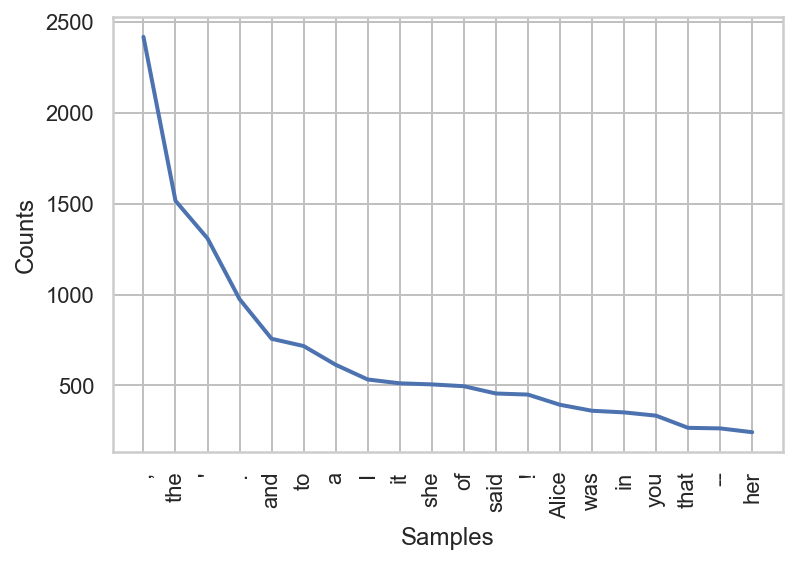

In [55]:
text.plot(20)# words frequency
plt.show()
%matplotlib inline


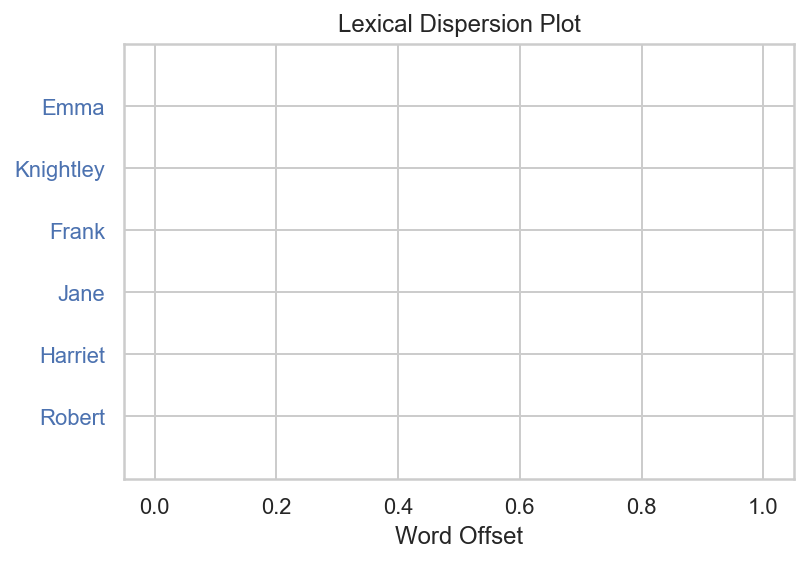

In [56]:
text.dispersion_plot(["Emma", "Knightley", "Frank", "Jane", "Harriet", "Robert"])
# 단어가 시간순으로 언급됨을 보여줌 

In [57]:
text.concordance("alice")

Displaying 25 of 396 matches:
[ Alice 's Adventures in Wonderland by Lewis
5 ] CHAPTER I . Down the Rabbit-Hole Alice was beginning to get very tired of s
hat is the use of a book , ' thought Alice 'without pictures or conversation ? 
so VERY remarkable in that ; nor did Alice think it so VERY much out of the way
looked at it , and then hurried on , Alice started to her feet , for it flashed
 hedge . In another moment down went Alice after it , never once considering ho
ped suddenly down , so suddenly that Alice had not a moment to think about stop
she fell past it . 'Well ! ' thought Alice to herself , 'after such a fall as t
own , I think -- ' ( for , you see , Alice had learnt several things of this so
tude or Longitude I 've got to ? ' ( Alice had no idea what Latitude was , or L
 . There was nothing else to do , so Alice soon began talking again . 'Dinah 'l
ats eat bats , I wonder ? ' And here Alice began to get rather sleepy , and wen
dry leaves , and the fall was over . Alice wa

In [58]:
# step 5
text.similar("alice", 1)

she


In [59]:
# step 6
text.common_contexts(["alice", "she"], 1)

and_was


# FreqDist¶

In [60]:
fd = text.vocab()
type(fd)

nltk.probability.FreqDist

In [61]:
from nltk import FreqDist

stopwords = ["Mr.", "Mrs.", "Miss", "Mr", "Mrs", "Dear"]
alice_tokens = pos_tag(word_tokenize(alice_raw))
name_list = [t[0]for t in alice_tokens if t[1]== "NNP"and t[0] not in stopwords]
fd_names = FreqDist(name_list)

In [62]:
# step 3 빈도분석
fd_names.N(), fd_names['Alice'], fd_names.freq('Alice')

(1676, 391, 0.23329355608591884)

In [63]:
fd_names.most_common(5) # 상품에 대한 감정분석 "형용사"를 뽑을때 

[('Alice', 391), ('Queen', 71), ('King', 60), ('Turtle', 58), ('Mock', 56)]

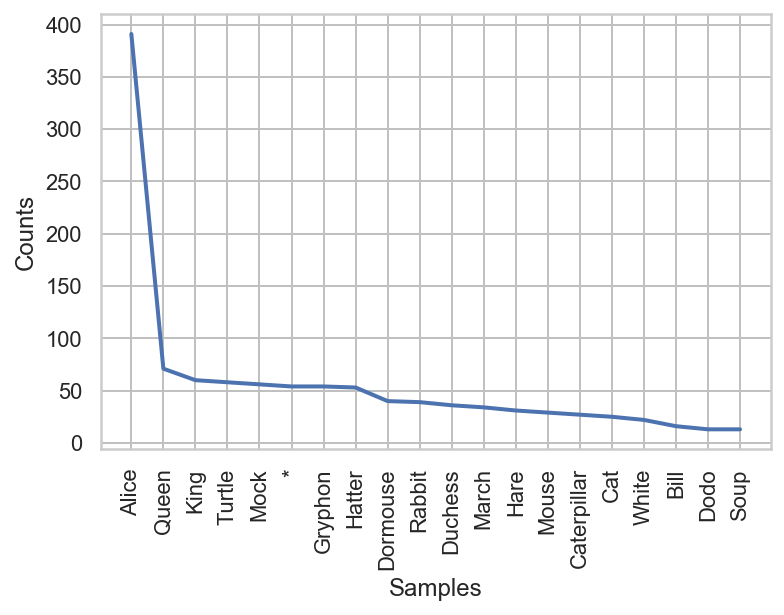

In [64]:

%config InlineBackend.figure_format = 'retina'
fd_names.plot(20)

(-0.5, 999.5, 799.5, -0.5)

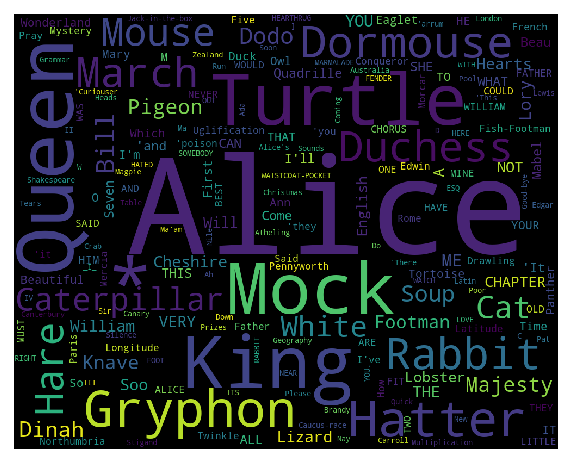

In [67]:
from wordcloud import WordCloud

wc = WordCloud(font_path=None,
    width=1000,
    height=800,
    margin=2,
    ranks_only=None,
    prefer_horizontal=0.9,
    mask=None,
    scale=1,
    color_func=None,
    max_words=200,
    min_font_size=4,
    stopwords=None,
    random_state=None,
    background_color='black',
    max_font_size=None,
    font_step=1,
    mode='RGB',
    relative_scaling='auto',
    regexp=None,
    collocations=True,
    colormap=None,
    normalize_plurals=True,
    contour_width=0,
    contour_color='black',
    repeat=False,
    include_numbers=False,
    min_word_length=0,
    collocation_threshold=30,
)

plt.imshow(wc.generate_from_frequencies(fd_names))

plt.axis('off')